In [1]:
from xgcm import Grid
import pop_tools
import gcsfs
import fsspec as fs
import numpy as np
import xesmf as xe
import xarray as xr
import random
import matplotlib.pyplot as plt
import warnings
from xgcm import Grid
import importlib
import preprocessing
import os

warnings.filterwarnings("ignore")

importlib.reload(preprocessing)
from preprocessing import preprocess_data

import aerobulk
from aerobulk import noskin

In [2]:
ds_merged = preprocess_data()
ds_merged

Load Data
Interpolating ocean velocities
Modify units
Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    dxt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht            (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_t        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [3]:
ds_in = ds_merged
ds_in = ds_in.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])

#take a sample of the earth for analysis
ds_highRes = ds_in.isel(time = slice(0,365), xt_ocean=slice(700,1500), yt_ocean=slice(1250, 1750)) 
ds_highRes

<xarray.Dataset>
Dimensions:       (time: 365, yt_ocean: 500, xt_ocean: 800)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.2 -130.1
  * yt_ocean      (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.82 44.89 44.97
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 800), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

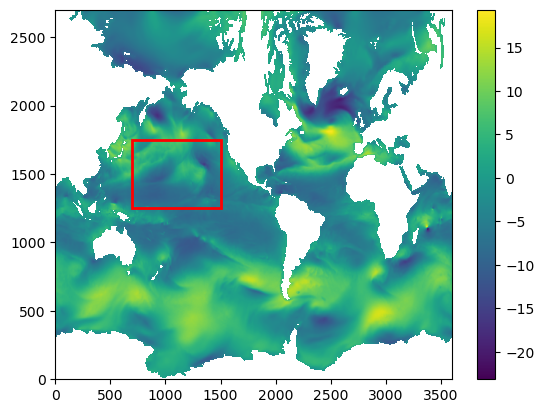

In [17]:
# Extract the data for the specific region
data = ds_in.u_ref.isel(time=0)

# Plot the data using pcolor
plt.pcolor(data, cmap='viridis')

# Get the bounds of the region (using the indices)
x_min, x_max = 700, 1500
y_min, y_max = 1250, 1750

# Draw a rectangle around the region (the coordinates are based on the index positions)
rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)  # Add the rectangle to the current axes

# Show the plot
plt.colorbar()
plt.show()


# Base case of air-sea flux calculations

In [4]:
from distributed import LocalCluster, Client
cluster = LocalCluster(n_workers=4, threads_per_worker=2) #default: n_workers=4, threads_per_worker=1
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/panalluri/proxy/34417/status,
Dashboard: /user/panalluri/proxy/34417/status,Workers: 4
Total threads: 8,Total memory: 125.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42341,Workers: 4
Dashboard: /user/panalluri/proxy/34417/status,Total threads: 8
Started: Just now,Total memory: 125.80 GiB
Comm: tcp://127.0.0.1:36399,Total threads: 2
Dashboard: /user/panalluri/proxy/44357/status,Memory: 31.45 GiB
Nanny: tcp://127.0.0.1:45487,


In [5]:
ds = xr.open_dataset(
    "gs://leap-persistent/panalluri/HF_highRes.zarr", engine="zarr", chunks={}
)
heatfluxHR = ds.__xarray_dataarray_variable__.isel(xt_ocean=slice(700,1500), yt_ocean=slice(1250, 1750))
heatfluxHR

<xarray.DataArray '__xarray_dataarray_variable__' (time: 365, yt_ocean: 500,
                                                   xt_ocean: 800)>
dask.array<getitem, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

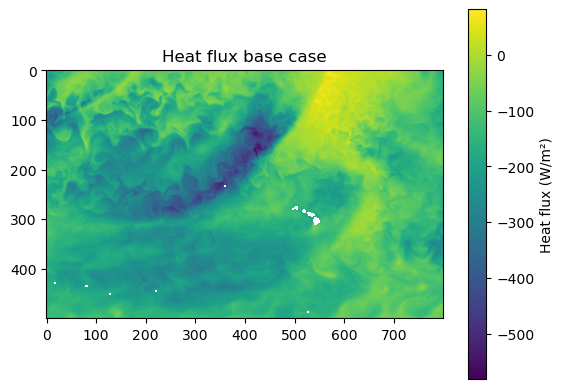

In [26]:
rotated_flipped = np.fliplr(np.rot90(heatfluxHR[0, :, :], 2))
im = plt.imshow(rotated_flipped)
plt.title("Heat flux base case")
plt.colorbar(im, label="Heat flux (W/m²)")
plt.show()

## SST Test 

In [6]:
SST_perturbed = ds_highRes.surface_temp + 0.01 * ds_highRes.surface_temp
SST_perturbed

<xarray.DataArray 'surface_temp' (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<add, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

In [7]:
ql, qh, taux, tauy, evap =  noskin(
        SST_perturbed,
        ds_highRes.t_ref,
        ds_highRes.q_ref,
        ds_highRes.u_relative,
        ds_highRes.v_relative,
        slp=ds_highRes.slp,
        algo='ecmwf',
        zt=2,
        zu=10,
)

heatflux_SSTpert = qh + ql
heatflux_SSTpert

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<add, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

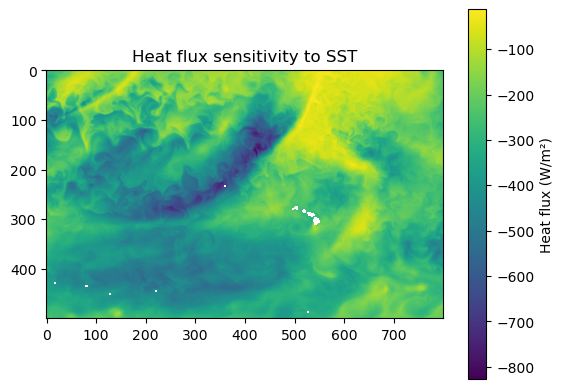

In [44]:
rotated_flipped = np.fliplr(np.rot90(heatflux_SSTpert[0, :, :], 2))
im = plt.imshow(rotated_flipped)
plt.title("Heat flux sensitivity to SST")
plt.colorbar(im, label="Heat flux (W/m²)")
plt.show()

In [8]:
sensitivity_SST = (heatflux_SSTpert - heatfluxHR) / heatfluxHR  * 100
sensitivity_SST

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<mul, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

## Reference temp (at 2m) Test

In [9]:
tref_perturbed = ds_highRes.t_ref + 0.01 * ds_highRes.t_ref

ql, qh, taux, tauy, evap =  noskin(
        ds_highRes.surface_temp,
        tref_perturbed,
        ds_highRes.q_ref,
        ds_highRes.u_relative,
        ds_highRes.v_relative,
        slp=ds_highRes.slp,
        algo='ecmwf',
        zt=2,
        zu=10,
)

heatflux_trefpert = qh + ql
heatflux_trefpert

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<add, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

In [10]:
sensitivity_tref = (heatflux_trefpert - heatfluxHR) / heatfluxHR  * 100
sensitivity_tref

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<mul, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

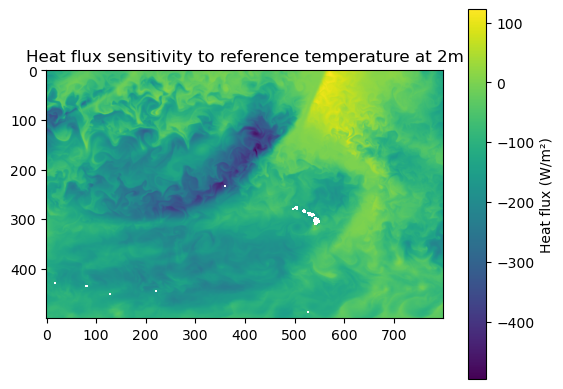

In [45]:
rotated_flipped = np.fliplr(np.rot90(heatflux_trefpert[0, :, :], 2))
im = plt.imshow(rotated_flipped)
plt.title("Heat flux sensitivity to reference temperature at 2m")
plt.colorbar(im, label="Heat flux (W/m²)")
plt.show()

## Reference specific humidity (at 2m) Test

In [11]:
qref_perturbed = ds_highRes.q_ref + 0.01 * ds_highRes.q_ref

ql, qh, taux, tauy, evap =  noskin(
        ds_highRes.surface_temp,
        ds_highRes.t_ref,
        qref_perturbed,
        ds_highRes.u_relative,
        ds_highRes.v_relative,
        slp=ds_highRes.slp,
        algo='ecmwf',
        zt=2,
        zu=10,
)

heatflux_qrefpert = qh + ql
heatflux_qrefpert

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<add, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

In [12]:
sensitivity_qref = (heatflux_qrefpert - heatfluxHR) / heatfluxHR  * 100
sensitivity_qref

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<mul, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

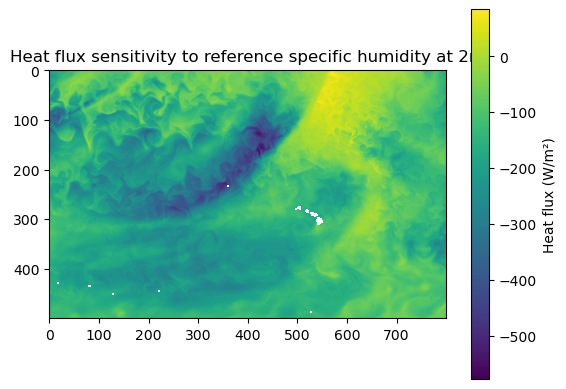

In [35]:
rotated_flipped = np.fliplr(np.rot90(heatflux_qrefpert[0, :, :], 2))
im = plt.imshow(rotated_flipped)
plt.title("Heat flux sensitivity to reference specific humidity at 2m")
plt.colorbar(im, label="Heat flux (W/m²)")
plt.show()

## Relative zonal velocity test

In [13]:
urel_perturbed = ds_highRes.u_relative + 0.01 * ds_highRes.u_relative

ql, qh, taux, tauy, evap =  noskin(
        ds_highRes.surface_temp,
        ds_highRes.t_ref,
        ds_highRes.q_ref,
        urel_perturbed,
        ds_highRes.v_relative,
        slp=ds_highRes.slp,
        algo='ecmwf',
        zt=2,
        zu=10,
)

heatflux_urelpert = qh + ql
heatflux_urelpert

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<add, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

In [14]:
sensitivity_urel = (heatflux_urelpert - heatfluxHR) / heatfluxHR  * 100
sensitivity_urel

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<mul, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

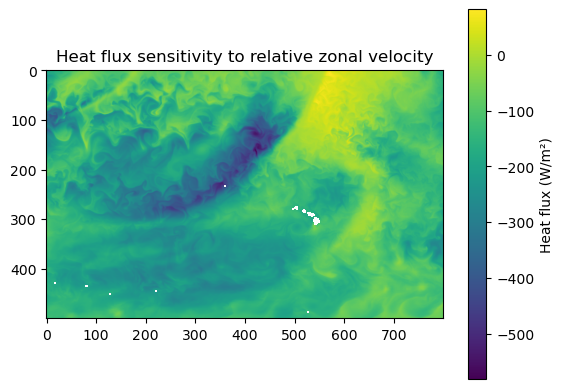

In [36]:
rotated_flipped = np.fliplr(np.rot90(heatflux_urelpert[0, :, :], 2))
im = plt.imshow(rotated_flipped)
plt.title("Heat flux sensitivity to relative zonal velocity")
plt.colorbar(im, label="Heat flux (W/m²)")
plt.show()

## Relative meridional velocity test

In [15]:
vrel_perturbed = ds_highRes.v_relative + 0.01 * ds_highRes.v_relative

ql, qh, taux, tauy, evap =  noskin(
        ds_highRes.surface_temp,
        ds_highRes.t_ref,
        ds_highRes.q_ref,
        ds_highRes.u_relative,
        vrel_perturbed,
        slp=ds_highRes.slp,
        algo='ecmwf',
        zt=2,
        zu=10,
)

heatflux_vrelpert = qh + ql
heatflux_vrelpert

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<add, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

In [16]:
sensitivity_vrel = (heatflux_vrelpert - heatfluxHR) / heatfluxHR  * 100
sensitivity_vrel

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<mul, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

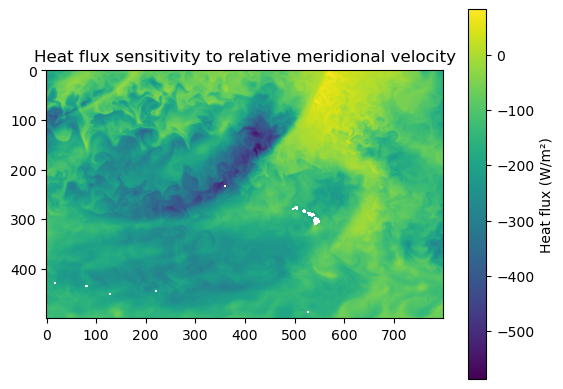

In [37]:
rotated_flipped = np.fliplr(np.rot90(heatflux_vrelpert[0, :, :], 2))
im = plt.imshow(rotated_flipped)
plt.title("Heat flux sensitivity to relative meridional velocity")
plt.colorbar(im, label="Heat flux (W/m²)")
plt.show()

## Sea level pressure test

In [17]:
slp_perturbed = ds_highRes.slp + 0.01 * ds_highRes.slp

ql, qh, taux, tauy, evap =  noskin(
        ds_highRes.surface_temp,
        ds_highRes.t_ref,
        ds_highRes.q_ref,
        ds_highRes.u_relative,
        ds_highRes.v_relative,
        slp=slp_perturbed,
        algo='ecmwf',
        zt=2,
        zu=10,
)

heatflux_slppert = qh + ql
heatflux_slppert

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<add, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

In [18]:
sensitivity_slp = (heatflux_slppert - heatfluxHR) / heatfluxHR  * 100
sensitivity_slp

<xarray.DataArray (time: 365, yt_ocean: 500, xt_ocean: 800)>
dask.array<mul, shape=(365, 500, 800), dtype=float32, chunksize=(3, 500, 800), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0181-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -209.9 -209.8 -209.7 ... -130.3 -130.2 -130.1
  * yt_ocean  (yt_ocean) float64 0.55 0.65 0.75 0.85 ... 44.75 44.82 44.89 44.97

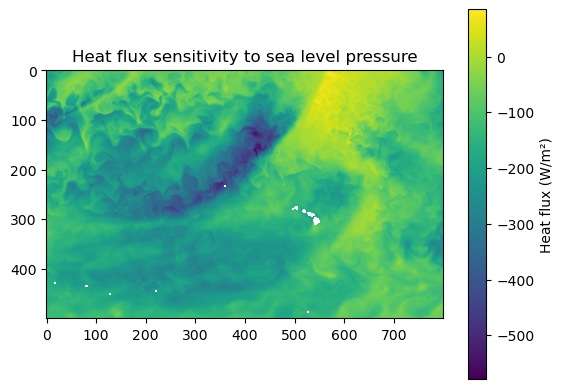

In [38]:
rotated_flipped = np.fliplr(np.rot90(heatflux_slppert[0, :, :], 2))
im = plt.imshow(rotated_flipped)
plt.title("Heat flux sensitivity to sea level pressure")
plt.colorbar(im, label="Heat flux (W/m²)")
plt.show()

## Results across all six perturbation cases

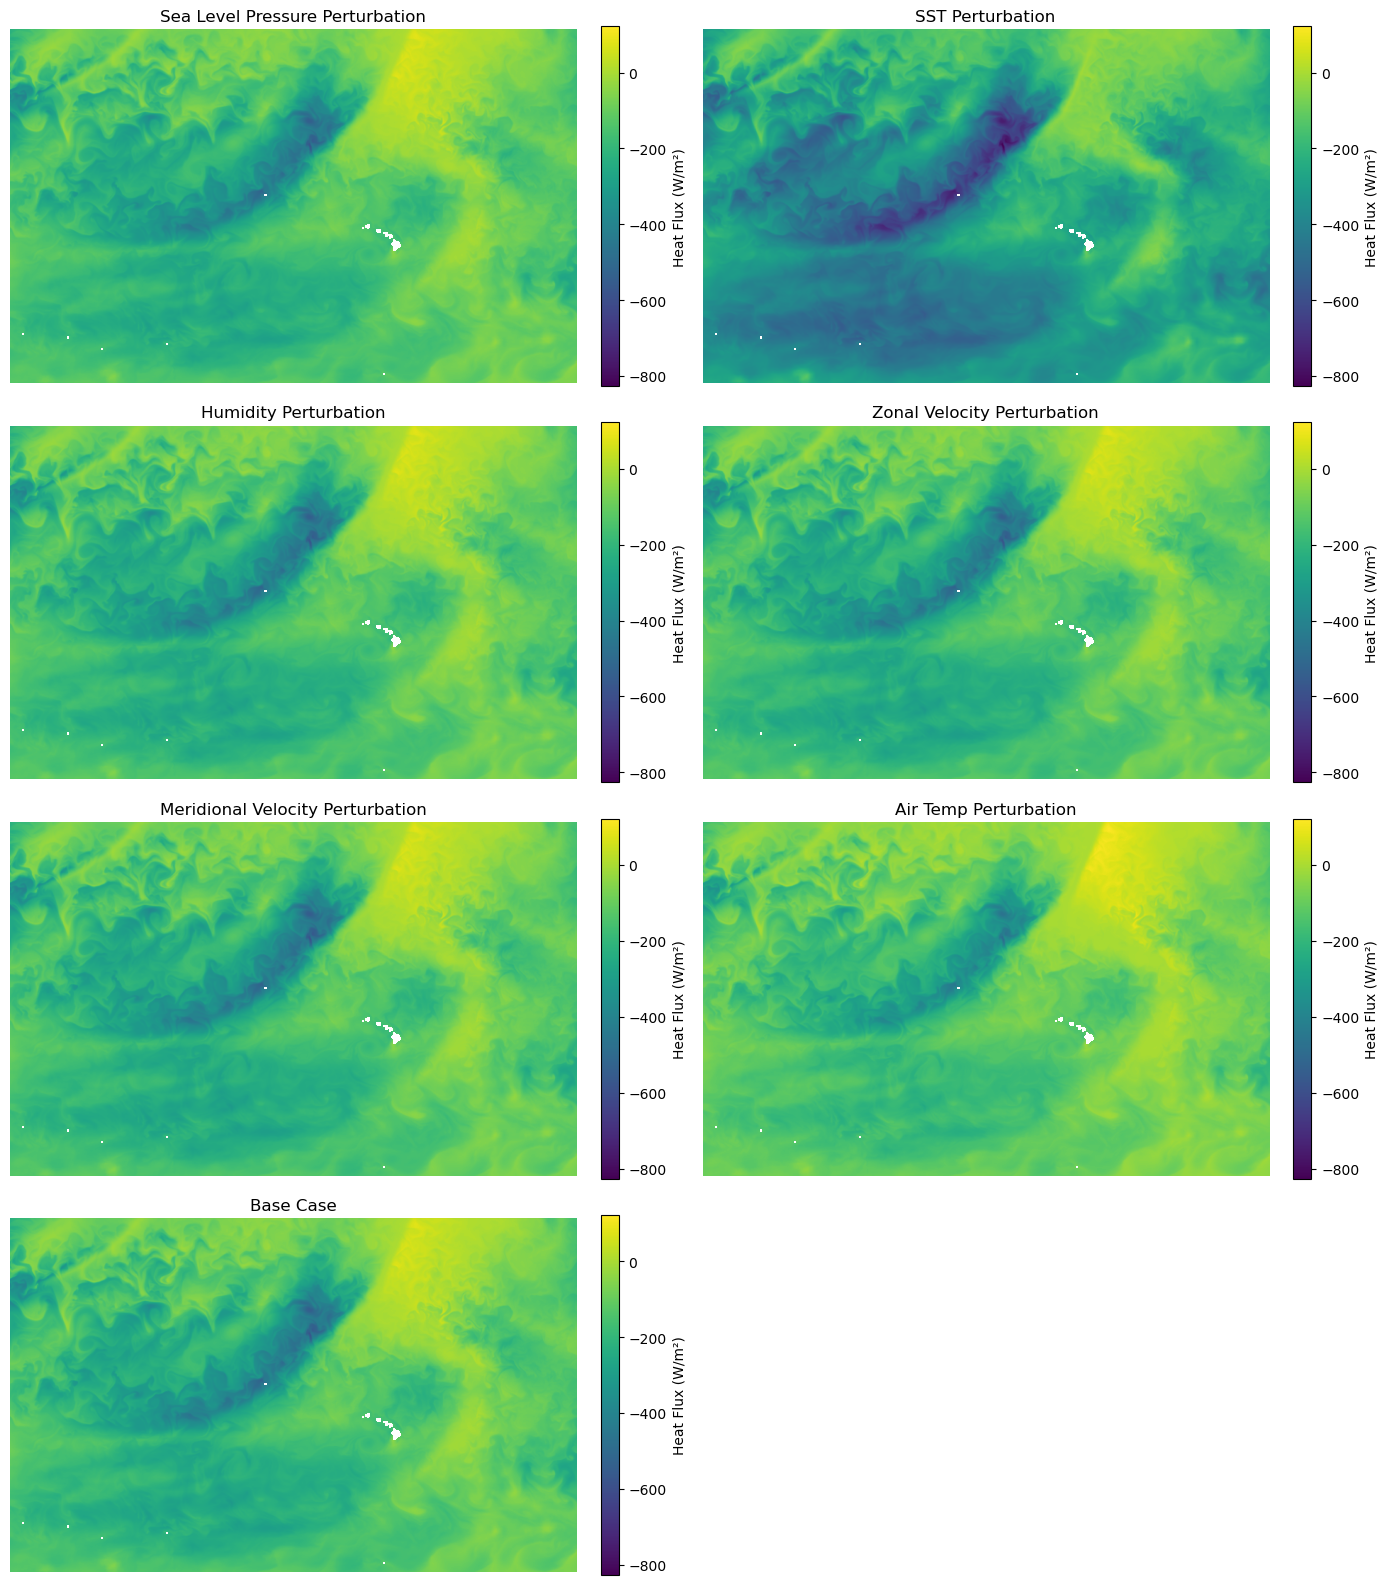

In [19]:
# Stack all 7 arrays: 6 perturbations + 1 base case
heatflux_list = [
    heatflux_slppert[0, :, :],
    heatflux_SSTpert[0, :, :],
    heatflux_qrefpert[0, :, :],
    heatflux_urelpert[0, :, :],
    heatflux_vrelpert[0, :, :],
    heatflux_trefpert[0, :, :],
    heatfluxHR[0, :, :]  # base case
]

titles = [
    "Sea Level Pressure Perturbation",
    "SST Perturbation",
    "Humidity Perturbation",
    "Zonal Velocity Perturbation",
    "Meridional Velocity Perturbation",
    "Air Temp Perturbation",
    "Base Case"
]

# Compute global vmin and vmax
vmin = min(np.nanmin(arr) for arr in heatflux_list)
vmax = max(np.nanmax(arr) for arr in heatflux_list)

# Set up a 4x2 grid (leave last cell empty for symmetry)
fig, axs = plt.subplots(4, 2, figsize=(14, 16))
axs = axs.flatten()

# Plot all 7 arrays
for i in range(6):
    rotated = np.fliplr(np.rot90(heatflux_list[i], 2))
    im = axs[i].imshow(rotated, vmin=vmin, vmax=vmax, cmap="viridis")
    axs[i].set_title(titles[i])
    axs[i].axis("off")
    fig.colorbar(im, ax=axs[i], fraction=0.046, pad=0.04, label="Heat Flux (W/m²)")


# Plot the base case in the 7th slot
rotated_base = np.fliplr(np.rot90(heatflux_list[6], 2))
im = axs[6].imshow(rotated_base, vmin=vmin, vmax=vmax, cmap="viridis")
axs[6].set_title("Base Case")
axs[6].axis("off")
fig.colorbar(im, ax=axs[6], fraction=0.046, pad=0.04, label="Heat Flux (W/m²)")

# Hide the 8th (empty) subplot
axs[7].axis("off")

plt.tight_layout()  # leave space for colorbar
plt.show()

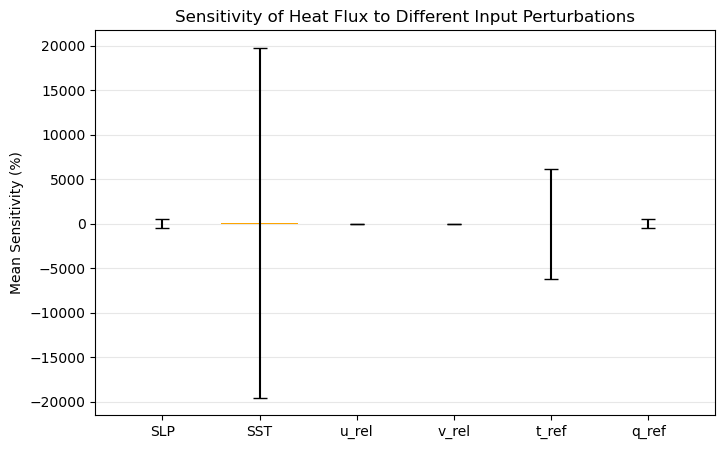

In [20]:
# Take spatial mean (e.g., mean over lat/lon dims)
mean_sensitivity_slp = np.nanmean(sensitivity_slp[0, :, :])
mean_sensitivity_SST = np.nanmean(sensitivity_SST[0, :, :])
mean_sensitivity_urel = np.nanmean(sensitivity_urel[0, :, :])
mean_sensitivity_vrel = np.nanmean(sensitivity_vrel[0, :, :])
mean_sensitivity_tref = np.nanmean(sensitivity_tref[0, :, :])
mean_sensitivity_qref = np.nanmean(sensitivity_qref[0, :, :])

# Optional: also compute standard deviation for error bars
std_sensitivity_slp = np.nanstd(sensitivity_slp[0, :, :])
std_sensitivity_SST = np.nanstd(sensitivity_SST[0, :, :])
std_sensitivity_urel = np.nanstd(sensitivity_urel[0, :, :])
std_sensitivity_vrel = np.nanstd(sensitivity_vrel[0, :, :])
std_sensitivity_tref = np.nanstd(sensitivity_tref[0, :, :])
std_sensitivity_qref = np.nanstd(sensitivity_qref[0, :, :])

# Prepare labels and values
labels = ['SLP', 'SST', 'u_rel', 'v_rel', 't_ref', 'q_ref']
means = [mean_sensitivity_slp, mean_sensitivity_SST, mean_sensitivity_urel, mean_sensitivity_vrel, mean_sensitivity_tref, mean_sensitivity_qref]
stds = [std_sensitivity_slp, std_sensitivity_SST, std_sensitivity_urel, std_sensitivity_vrel, std_sensitivity_tref, std_sensitivity_qref]

# Plot bar graph with error bars
plt.figure(figsize=(8,5))
plt.bar(labels, means, yerr=stds, capsize=5, color=['blue', 'orange', 'green', 'blue', 'orange', 'green'])
plt.ylabel('Mean Sensitivity (%)')
plt.title('Sensitivity of Heat Flux to Different Input Perturbations')
plt.grid(axis='y', alpha=0.3)
plt.show()


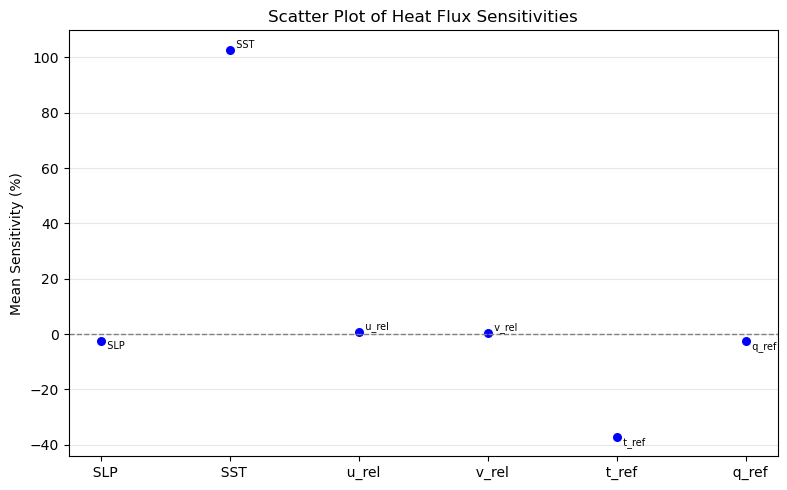

In [34]:
labels = ['  SLP', '  SST', '  u_rel', '  v_rel', '  t_ref', '  q_ref']

# Assign x positions for each point
x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.scatter(x, means, color='blue', s=30)  # s controls marker size

# Add labels above each point
for i, (label, mean) in enumerate(zip(labels, means)):
    plt.text(i, mean, label, fontsize=7, ha='left', va='bottom' if mean >= 0 else 'top')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(x, labels)  # Optional: to keep the x-axis labeled
plt.ylabel('Mean Sensitivity (%)')
plt.title('Scatter Plot of Heat Flux Sensitivities')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
